In [51]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv('data_students_performance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [53]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: >

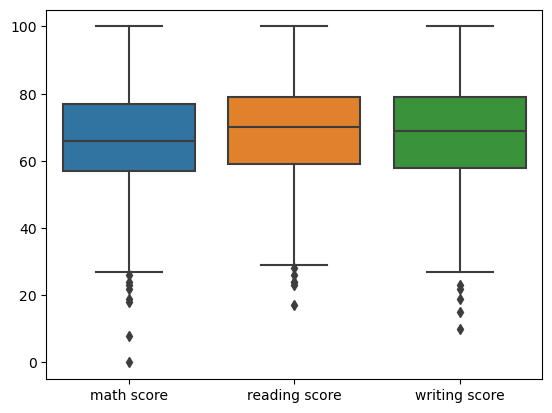

In [54]:
# Outliers using boxplot
import seaborn as sns
sns.boxplot(df)

In [55]:
# Outliers using IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    IQR = q3-q1
    lw_bound = q1-(1.5*IQR)
    up_bound = q3+(1.5*IQR)
    
    for i in data:
        if(i < lw_bound or i > up_bound):
            outliers.append(i)
    return outliers

In [56]:
math_score_outliers = detect_outliers_iqr(df['math score'])
reading_score_outliers = detect_outliers_iqr(df['reading score'])
writing_score_outliers = detect_outliers_iqr(df['writing score'])

print('Math score ouliers', math_score_outliers)
print('Reading score ouliers', reading_score_outliers)
print('Writing score ouliers', writing_score_outliers)

Math score ouliers [0, 8, 18, 19, 22, 23, 24, 26]
Reading score ouliers [17, 23, 24, 24, 26, 28]
Writing score ouliers [10, 15, 19, 22, 23]


In [60]:
# Outliers using Z score
def detect_outliers_z(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers

In [61]:
math_score_outliers_z = detect_outliers_z(df['math score'])
reading_score_outliers_z = detect_outliers_z(df['reading score'])
writing_score_outliers_z = detect_outliers_z(df['writing score'])

print('Math score ouliers', math_score_outliers_z)
print('Reading score ouliers', reading_score_outliers_z)
print('Writing score ouliers', writing_score_outliers_z)

Math score ouliers [18, 0, 19, 8]
Reading score ouliers [17, 23, 24, 24]
Writing score ouliers [10, 22, 19, 15]


In [62]:
# Removing Outliers by replacing them with their median
# Iqr based outliers are better

def remove_outliers(data):
    outliers = detect_outliers_iqr(data)
    median = np.median(data)
    cleaned_data = [median if i in outliers else i for i in data]
    return cleaned_data

In [63]:
df['math score'] = remove_outliers(df['math score'])
df['reading score'] = remove_outliers(df['reading score'])
df['writing score'] = remove_outliers(df['writing score'])

<Axes: >

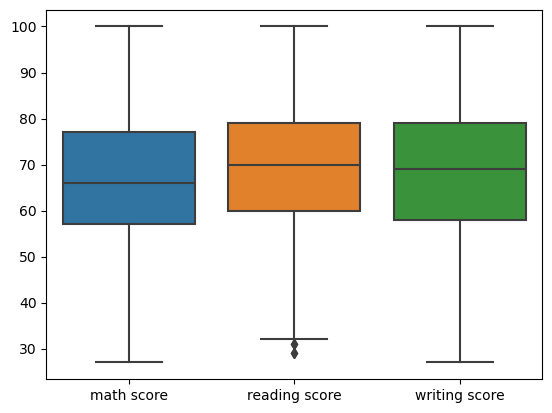

In [64]:
sns.boxplot(df)

In [65]:
df['reading score'] = remove_outliers(df['reading score'])

<Axes: >

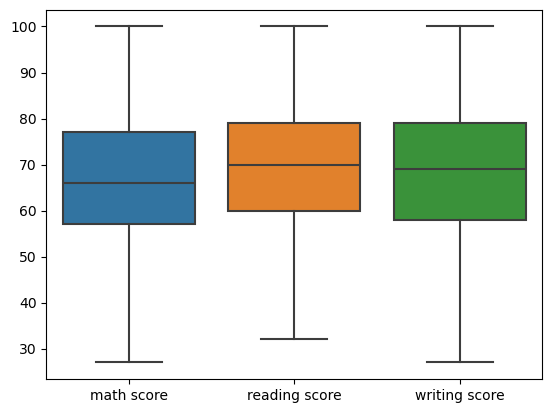

In [66]:
sns.boxplot(df)

C:\Users\valla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


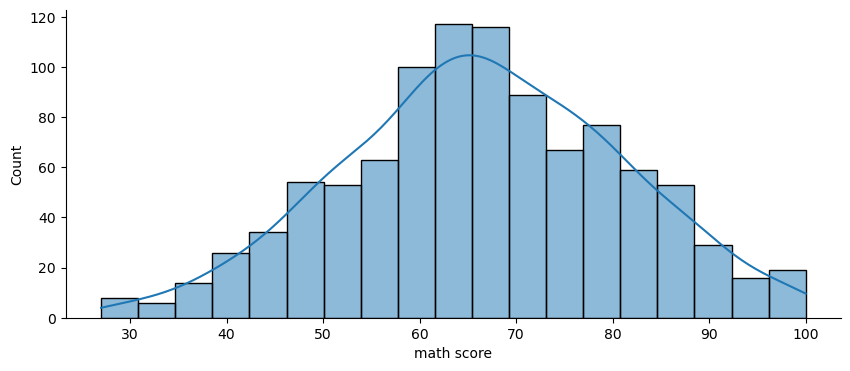

C:\Users\valla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


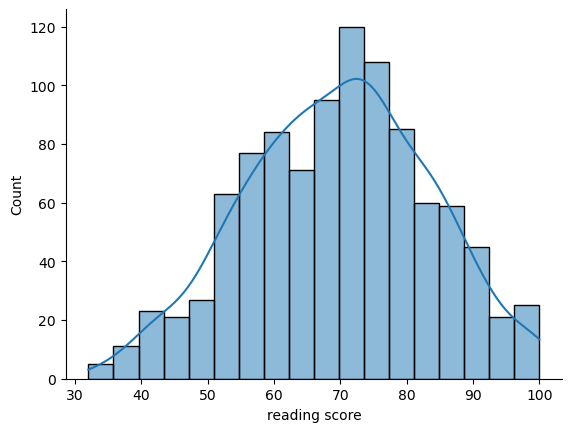

C:\Users\valla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


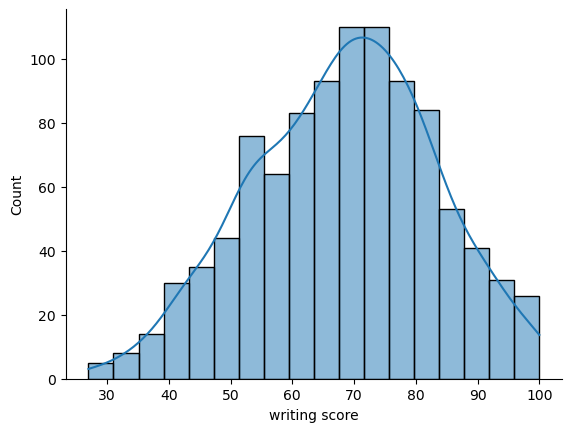

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

for i in ['math score', 'reading score', 'writing score']:
    sns.histplot(df[i], kde=True)
    sns.despine()
    plt.show()
    print("\n\n")

In [69]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [71]:
df['gender'] = df['gender'].astype('category')

In [72]:
df.dtypes

gender                         category
race/ethnicity                   object
parental level of education      object
lunch                            object
test preparation course          object
math score                      float64
reading score                   float64
writing score                   float64
dtype: object

In [78]:
df['math score'] = df['math score'].astype(int)

In [79]:
df.dtypes

gender                         category
race/ethnicity                   object
parental level of education      object
lunch                            object
test preparation course          object
math score                        int32
reading score                   float64
writing score                   float64
dtype: object